In [37]:
import pandas as pd
import numpy as np

In [38]:
#importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [39]:
#World Cup 2022 Data From https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset
world_cup_df = pd.read_csv('Fifa_world_cup_matches.csv')

In [ ]:
world_cup_df.info()

In [41]:
#higher possesion makes more goal then other team hypothesis check

In [42]:
#Extracting only needed columns from original dataframe, and converting percentages from objects to float
world_cup_df_possession = world_cup_df.iloc[:,0:7]
world_cup_df_possession["possession team1"] = world_cup_df_possession["possession team1"] .str.replace('%','')
world_cup_df_possession["possession team2"] = world_cup_df_possession["possession team2"] .str.replace('%','')
world_cup_df_possession["possession in contest"] = world_cup_df_possession["possession in contest"] .str.replace('%','')
world_cup_df_possession["possession team1"] = world_cup_df_possession["possession team1"].astype("float64")
world_cup_df_possession["possession team2"] = world_cup_df_possession["possession team2"].astype("float64")
world_cup_df_possession["possession in contest"] = world_cup_df_possession["possession in contest"].astype("float64")
world_cup_df_possession.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2
0,QATAR,ECUADOR,42.0,50.0,8.0,0,2
1,ENGLAND,IRAN,72.0,19.0,9.0,6,2
2,SENEGAL,NETHERLANDS,44.0,45.0,11.0,0,2
3,UNITED STATES,WALES,51.0,39.0,10.0,1,1
4,ARGENTINA,SAUDI ARABIA,64.0,24.0,12.0,1,2


In [64]:
#Adding total goals scored in each game
world_cup_df_possession["total goals"] = world_cup_df_possession["number of goals team1"] + world_cup_df_possession["number of goals team2"]
world_cup_df_possession.head()  

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,result,total goals
0,QATAR,ECUADOR,42.0,50.0,8.0,0,2,2,2
1,ENGLAND,IRAN,72.0,19.0,9.0,6,2,0,8
2,SENEGAL,NETHERLANDS,44.0,45.0,11.0,0,2,2,2
3,UNITED STATES,WALES,51.0,39.0,10.0,1,1,1,2
4,ARGENTINA,SAUDI ARABIA,64.0,24.0,12.0,1,2,2,3


In [43]:
#Adding game result column as new column
world_cup_df_possession["result"] = np.where(world_cup_df_possession["number of goals team1"] > world_cup_df_possession["number of goals team2"], 0, np.where(world_cup_df_possession["number of goals team1"] == world_cup_df_possession["number of goals team2"], 1, 2))
world_cup_df_possession.head()  

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,result
0,QATAR,ECUADOR,42.0,50.0,8.0,0,2,2
1,ENGLAND,IRAN,72.0,19.0,9.0,6,2,0
2,SENEGAL,NETHERLANDS,44.0,45.0,11.0,0,2,2
3,UNITED STATES,WALES,51.0,39.0,10.0,1,1,1
4,ARGENTINA,SAUDI ARABIA,64.0,24.0,12.0,1,2,2


In [65]:
world_cup_df_possession.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team1                  64 non-null     object 
 1   team2                  64 non-null     object 
 2   possession team1       64 non-null     float64
 3   possession team2       64 non-null     float64
 4   possession in contest  64 non-null     float64
 5   number of goals team1  64 non-null     int64  
 6   number of goals team2  64 non-null     int64  
 7   result                 64 non-null     int32  
 8   total goals            64 non-null     int64  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 4.4+ KB


<Figure size 800x1800 with 0 Axes>

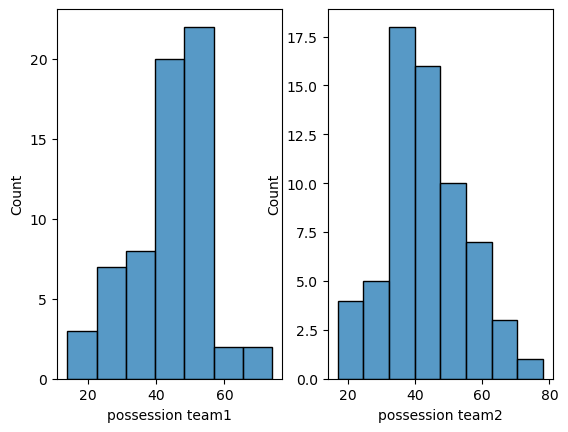

In [78]:
#Distrubition of possesions
plt.figure(figsize=(8,18))
figure, axis = plt.subplots(1, 2)
sns.histplot(world_cup_df_possession["possession team1"], kde=False, ax=axis[0])
sns.histplot(world_cup_df_possession["possession team2"], kde=False, ax=axis[1])
plt.show()

### Deep dive for outliers

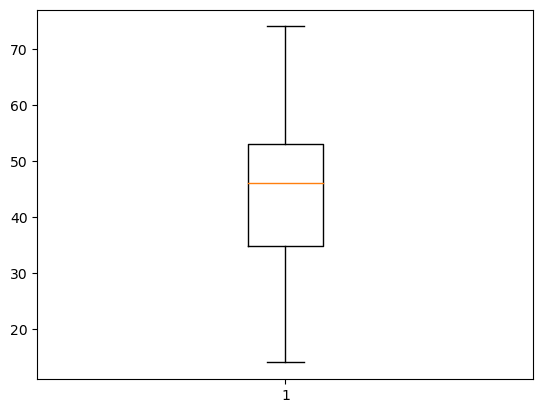

In [46]:
plt.boxplot(world_cup_df_possession["possession team1"])
plt.show()

Looks like there is no outlier for Team1!

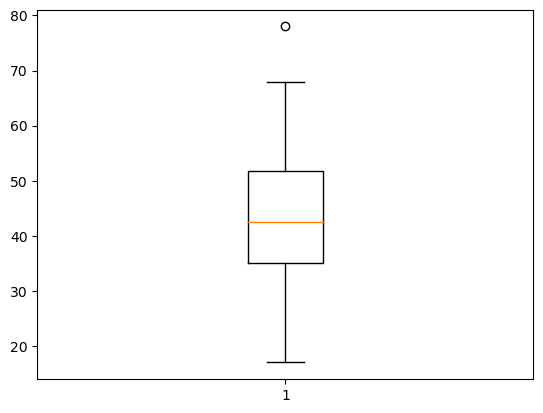

In [47]:
plt.boxplot(world_cup_df_possession["possession team2"])
plt.show()

Looks like there is an outlier value for Team2. Let's look deep dive for team 2.

In [48]:
#importing zscore from scipy library
from scipy.stats import zscore
import scipy.stats as stats

In [55]:
z_scores_possession_team2 = zscore(world_cup_df_possession["possession team1"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores_possession_team2 > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 4
------
Threshold value: 2
Number of Outliers: 2
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [56]:
z_scores_possession_team2 = zscore(world_cup_df_possession["possession team2"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores_possession_team2 > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 11
------
Threshold value: 2
Number of Outliers: 2
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


## Analyzing Relations

#### Multivariate Analysis

In [68]:
world_cup_df_possession.corr()

,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,result,total goals
possession team1,1.000000,-0.980322,-0.100235,0.264346,0.055033,0.078996,0.247328
possession team2,-0.980322,1.000000,-0.097210,-0.208867,-0.076160,-0.137265,-0.213647
possession in contest,-0.100235,-0.097210,1.000000,-0.284214,0.110817,0.305718,-0.171102
number of goals team1,0.264346,-0.208867,-0.284214,1.000000,0.018927,-0.561851,0.830058
number of goals team2,0.055033,-0.076160,0.110817,0.018927,1.000000,0.656016,0.573289
result,0.078996,-0.137265,0.305718,-0.561851,0.656016,1.000000,-0.094526
total goals,0.247328,-0.213647,-0.171102,0.830058,0.573289,-0.094526,1.000000


**Note:** According to correlation analyses looks like there is no correlation between possession of team2 and goals scored by them. However, team1 is more related with possession and goals scored. Let's keep going

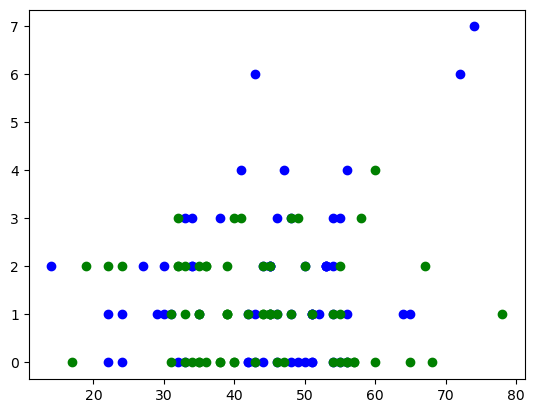

In [75]:
plt.plot(world_cup_df_possession["possession team1"], world_cup_df_possession["number of goals team1"], 'bo')
plt.plot(world_cup_df_possession["possession team2"], world_cup_df_possession["number of goals team2"], 'go')
plt.show()